In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# ls -lah '/content/drive/MyDrive/Dubai Dataset'


total 4.0K
drwx------ 2 root root 4.0K Apr 28 06:28 'Semantic segmentation dataset'/


# New Section

In [6]:
!dir 'DubaiDataset'


 Volume in drive E is Data
 Volume Serial Number is 7613-A0E0

 Directory of e:\Data_Science\Code\U-net Deep_works



File Not Found


In [9]:
data_root_folder='./'

In [10]:
dataset_name='DubaiDataset'

In [11]:
import os
for path, subdirs, files in os.walk(os.path.join(data_root_folder,dataset_name)):
  dir_name =path.split(os.path.sep)[-1]
  print(dir_name)

./DubaiDataset
Tile 1
images
masks
Tile 2
images
masks
Tile 3
images
masks
Tile 4
images
masks
Tile 5
images
masks
Tile 6
images
masks
Tile 7
images
masks
Tile 8
images
masks


In [12]:
for path, subdirs, files in os.walk(os.path.join(data_root_folder,dataset_name)):
  dir_name =path.split(os.path.sep)[-1]
  print(dir_name)
  if dir_name=='images': #Access all the images only
    images=os.listdir(path)
    #print(images)
    for i, image_name in enumerate(images): #list each image
      if image_name.endswith('.jpg'):
        print(image_name)
  if dir_name=='masks': #Access all the masks only
    masks=os.listdir(path)
    #print(masks)
    for i, mask_name in enumerate(masks):
      if mask_name.endswith('.png'):
        print(mask_name)



./DubaiDataset
Tile 1
images
image_part_001.jpg
image_part_002.jpg
image_part_003.jpg
image_part_004.jpg
image_part_005.jpg
image_part_006.jpg
image_part_007.jpg
image_part_008.jpg
image_part_009.jpg
masks
image_part_001.png
image_part_002.png
image_part_003.png
image_part_004.png
image_part_005.png
image_part_006.png
image_part_007.png
image_part_008.png
image_part_009.png
Tile 2
images
image_part_001.jpg
image_part_002.jpg
image_part_003.jpg
image_part_004.jpg
image_part_005.jpg
image_part_006.jpg
image_part_007.jpg
image_part_008.jpg
image_part_009.jpg
masks
image_part_001.png
image_part_002.png
image_part_003.png
image_part_004.png
image_part_005.png
image_part_006.png
image_part_007.png
image_part_008.png
image_part_009.png
Tile 3
images
image_part_001.jpg
image_part_002.jpg
image_part_003.jpg
image_part_004.jpg
image_part_005.jpg
image_part_006.jpg
image_part_007.jpg
image_part_008.jpg
image_part_009.jpg
masks
image_part_001.png
image_part_002.png
image_part_003.png
image_part_00

In [13]:
# Read the Images
import cv2

In [14]:
image=cv2.imread(f'{data_root_folder}/{dataset_name}/Tile 1/images/image_part_001.jpg',1)
image.shape

(644, 797, 3)

In [15]:
image=cv2.imread(f'{data_root_folder}/{dataset_name}/Tile 2/images/image_part_001.jpg',1)
image.shape

(544, 509, 3)

In [13]:
#Conclusion all images are of different shapes in different Tile Folder.
# Now we need to process these images to maintain uniformity w.r.t shape.

In [14]:
#Reading and Processing Satellite Images

In [16]:
image_dataset=[]
#Reading Image shape
image_extension='.jpg'
for tile_id in range(1,8):
  for image_id in range(1,200):
    image=cv2.imread(f'{data_root_folder}/{dataset_name}/Tile {tile_id}/images/image_part_00{image_id}.jpg',1)
    if image is not None:
      print(image.shape)
#Reading Mask Shape
print('Reading Masks Shape and their ids')
image_extension='.png'
for tile_id in range(1,8):
  for image_id in range(1,200):
    image=cv2.imread(f'{data_root_folder}/{dataset_name}/Tile {tile_id}/masks/image_part_00{image_id}.png',1)
    if image is not None:
      print(image.shape)


(644, 797, 3)
(644, 797, 3)
(644, 797, 3)
(643, 797, 3)
(643, 797, 3)
(643, 797, 3)
(644, 797, 3)
(644, 797, 3)
(644, 797, 3)
(544, 509, 3)
(544, 510, 3)
(544, 509, 3)
(544, 509, 3)
(544, 510, 3)
(544, 509, 3)
(544, 509, 3)
(544, 510, 3)
(544, 509, 3)
(658, 682, 3)
(658, 682, 3)
(658, 682, 3)
(658, 682, 3)
(658, 682, 3)
(658, 682, 3)
(658, 682, 3)
(658, 682, 3)
(658, 682, 3)
(846, 1099, 3)
(846, 1099, 3)
(846, 1099, 3)
(846, 1099, 3)
(846, 1099, 3)
(846, 1099, 3)
(846, 1099, 3)
(846, 1099, 3)
(846, 1099, 3)
(1058, 1126, 3)
(1058, 1126, 3)
(1058, 1126, 3)
(1058, 1126, 3)
(1058, 1126, 3)
(1058, 1126, 3)
(1058, 1126, 3)
(1058, 1126, 3)
(1058, 1126, 3)
(838, 859, 3)
(838, 859, 3)
(838, 859, 3)
(838, 859, 3)
(838, 859, 3)
(838, 859, 3)
(838, 859, 3)
(838, 859, 3)
(838, 859, 3)
(2061, 1817, 3)
(2061, 1816, 3)
(2061, 1817, 3)
(2062, 1817, 3)
(2062, 1816, 3)
(2062, 1817, 3)
(2061, 1817, 3)
(2061, 1816, 3)
(2061, 1817, 3)
Reading Masks Shape and their ids
(644, 797, 3)
(644, 797, 3)
(644, 797, 

In [16]:
# pip install pillow

In [17]:
from PIL import Image


In [18]:
image_dataset=[]
#Reading Image shape
image_extension='.jpg'
image_patch_size=256
for tile_id in range(1,8):
  print(tile_id)
  for image_id in range(1,200):
    image=cv2.imread(f'{data_root_folder}/{dataset_name}/Tile {tile_id}/images/image_part_00{image_id}.jpg',1)
    if image is not None:
      size_x=(image.shape[1]//image_patch_size)*image_patch_size
      size_y=(image.shape[0]//image_patch_size)*image_patch_size
      image=Image.fromarray(image)
      image=image.crop((0,0,size_x,size_y))
      print('({},  {})'.format(image.size[0],image.size[1])) #Crop the images such that each image is in multiple of 256


1
(768,  512)
(768,  512)
(768,  512)
(768,  512)
(768,  512)
(768,  512)
(768,  512)
(768,  512)
(768,  512)
2
(256,  512)
(256,  512)
(256,  512)
(256,  512)
(256,  512)
(256,  512)
(256,  512)
(256,  512)
(256,  512)
3
(512,  512)
(512,  512)
(512,  512)
(512,  512)
(512,  512)
(512,  512)
(512,  512)
(512,  512)
(512,  512)
4
(1024,  768)
(1024,  768)
(1024,  768)
(1024,  768)
(1024,  768)
(1024,  768)
(1024,  768)
(1024,  768)
(1024,  768)
5
(1024,  1024)
(1024,  1024)
(1024,  1024)
(1024,  1024)
(1024,  1024)
(1024,  1024)
(1024,  1024)
(1024,  1024)
(1024,  1024)
6
(768,  768)
(768,  768)
(768,  768)
(768,  768)
(768,  768)
(768,  768)
(768,  768)
(768,  768)
(768,  768)
7
(1792,  2048)
(1792,  2048)
(1792,  2048)
(1792,  2048)
(1792,  2048)
(1792,  2048)
(1792,  2048)
(1792,  2048)
(1792,  2048)


In [19]:
!pip install patchify

In [19]:
#Now Create the patches in multiple of 256
from patchify import patchify

In [20]:
import numpy as np
image_dataset=[]
#Reading Image shape
image_extension='.jpg'
image_patch_size=256
for tile_id in range(1,8):
  print(tile_id)
  for image_id in range(1,200):
    image=cv2.imread(f'{data_root_folder}/{dataset_name}/Tile {tile_id}/images/image_part_00{image_id}.jpg',1)
    if image is not None:
      size_x=(image.shape[1]//image_patch_size)*image_patch_size
      size_y=(image.shape[0]//image_patch_size)*image_patch_size
      image=Image.fromarray(image)
      image=image.crop((0,0,size_x,size_y))
      print('({},  {})'.format(image.size[0],image.size[1])) #Crop the images such that each image is in multiple of 256
      image=np.array(image) #Convert image into numpy array as patchify takes the input in the form of numpy array
      patched_images=patchify(image,(image_patch_size,image_patch_size,3),step=image_patch_size)
      print('No of Patches generated=',len(patched_images))
      print('Shape of patched image=',patched_images.shape)

1
(768,  512)
No of Patches generated= 2
Shape of patched image= (2, 3, 1, 256, 256, 3)
(768,  512)
No of Patches generated= 2
Shape of patched image= (2, 3, 1, 256, 256, 3)
(768,  512)
No of Patches generated= 2
Shape of patched image= (2, 3, 1, 256, 256, 3)
(768,  512)
No of Patches generated= 2
Shape of patched image= (2, 3, 1, 256, 256, 3)
(768,  512)
No of Patches generated= 2
Shape of patched image= (2, 3, 1, 256, 256, 3)
(768,  512)
No of Patches generated= 2
Shape of patched image= (2, 3, 1, 256, 256, 3)
(768,  512)
No of Patches generated= 2
Shape of patched image= (2, 3, 1, 256, 256, 3)
(768,  512)
No of Patches generated= 2
Shape of patched image= (2, 3, 1, 256, 256, 3)
(768,  512)
No of Patches generated= 2
Shape of patched image= (2, 3, 1, 256, 256, 3)
2
(256,  512)
No of Patches generated= 2
Shape of patched image= (2, 1, 1, 256, 256, 3)
(256,  512)
No of Patches generated= 2
Shape of patched image= (2, 1, 1, 256, 256, 3)
(256,  512)
No of Patches generated= 2
Shape of pa

In [21]:
print(patched_images.shape)
print(patched_images.shape[0])
print(patched_images.shape[1])

(8, 7, 1, 256, 256, 3)
8
7


In [22]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [23]:
minmaxscaler=MinMaxScaler()

In [24]:
image_extension='.jpg'
image_patch_size=256
for tile_id in range(1,8):
  print(tile_id)
  for image_id in range(1,200):
    image=cv2.imread(f'{data_root_folder}/{dataset_name}/Tile {tile_id}/images/image_part_00{image_id}.jpg',1)
    if image is not None:
      size_x=(image.shape[1]//image_patch_size)*image_patch_size
      size_y=(image.shape[0]//image_patch_size)*image_patch_size
      image=Image.fromarray(image)
      image=image.crop((0,0,size_x,size_y))
      #print('({},  {})'.format(image.size[0],image.size[1])) #Crop the images such that each image is in multiple of 256
      image=np.array(image) #Convert image into numpy array as patchify takes the input in the form of numpy array
      patched_images=patchify(image,(image_patch_size,image_patch_size,3),step=image_patch_size)
      #print('No of Patches generated=',len(patched_images))
      #print('Shape of patched image=',patched_images.shape)
      # Now we need to enumerate for all patches in the image w.r.t shape[0] and shape[1]
      for i in range(patched_images.shape[0]):
        for j in range(patched_images.shape[1]):
          individual_patched_image=patched_images[i,j,:,:]
          print(individual_patched_image.shape)
          # Now to Normalize our data we need to use Min Max Scaler
          #Convert image shape from (1,256,256,3) to (256,256,3)
          individual_patched_image=minmaxscaler.fit_transform(individual_patched_image.reshape(-1,individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
          individual_patched_image=individual_patched_image[0]
          print('Now Actual Patched Image size is: ',individual_patched_image.shape)
          #Now store all these individual patched images into Image dataset to create final dataset
          image_dataset.append(individual_patched_image)

1
(1, 256, 256, 3)
Now Actual Patched Image size is:  (256, 256, 3)
(1, 256, 256, 3)
Now Actual Patched Image size is:  (256, 256, 3)
(1, 256, 256, 3)
Now Actual Patched Image size is:  (256, 256, 3)
(1, 256, 256, 3)
Now Actual Patched Image size is:  (256, 256, 3)
(1, 256, 256, 3)
Now Actual Patched Image size is:  (256, 256, 3)
(1, 256, 256, 3)
Now Actual Patched Image size is:  (256, 256, 3)
(1, 256, 256, 3)
Now Actual Patched Image size is:  (256, 256, 3)
(1, 256, 256, 3)
Now Actual Patched Image size is:  (256, 256, 3)
(1, 256, 256, 3)
Now Actual Patched Image size is:  (256, 256, 3)
(1, 256, 256, 3)
Now Actual Patched Image size is:  (256, 256, 3)
(1, 256, 256, 3)
Now Actual Patched Image size is:  (256, 256, 3)
(1, 256, 256, 3)
Now Actual Patched Image size is:  (256, 256, 3)
(1, 256, 256, 3)
Now Actual Patched Image size is:  (256, 256, 3)
(1, 256, 256, 3)
Now Actual Patched Image size is:  (256, 256, 3)
(1, 256, 256, 3)
Now Actual Patched Image size is:  (256, 256, 3)
(1, 256,

In [25]:
#Check the total number of images in image dataset
len(image_dataset)

945

In [26]:
#Processing Images and Masks together
image_dataset=[]
masks_dataset=[]
for image_type in ['images', 'masks']:
  if image_type=='images':
    image_extension='jpg'
  elif image_type=='masks':
    image_extension='png'
  image_patch_size=256
  for tile_id in range(1,8):
    #print(tile_id)
    for image_id in range(1,200):
      image=cv2.imread(f'{data_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
      if image is not None:
        if image_type=='masks': #Only for masks this conversion is required
          image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        size_x=(image.shape[1]//image_patch_size)*image_patch_size
        size_y=(image.shape[0]//image_patch_size)*image_patch_size
        image=Image.fromarray(image)
        image=image.crop((0,0,size_x,size_y))
        #print('({},  {})'.format(image.size[0],image.size[1])) #Crop the images such that each image is in multiple of 256
        image=np.array(image) #Convert image into numpy array as patchify takes the input in the form of numpy array
        patched_images=patchify(image,(image_patch_size,image_patch_size,3),step=image_patch_size)
        #print('No of Patches generated=',len(patched_images))
        #print('Shape of patched image=',patched_images.shape)
        # Now we need to enumerate for all patches in the image w.r.t shape[0] and shape[1]
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type=='images': #MINMAX transformation is required only for input images not fot masks
              individual_patched_image=patched_images[i,j,:,:]
              #print(individual_patched_image.shape)
              # Now to Normalize our data we need to use Min Max Scaler
              #Convert image shape from (1,256,256,3) to (256,256,3)
              individual_patched_image=minmaxscaler.fit_transform(individual_patched_image.reshape(-1,individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image=individual_patched_image[0] #to take out (256,256,3) from (1,256,256,3).
              #print('Now Actual Patched Image size is: ',individual_patched_image.shape)
              #Now store all these individual patched images into Image dataset to create final dataset
              image_dataset.append(individual_patched_image)
            elif image_type=='masks':
              individual_patched_mask=patched_images[i,j,:,:]
              individual_patched_mask=individual_patched_mask[0]
              masks_dataset.append(individual_patched_mask)


In [27]:
print(len(image_dataset))
print(len(masks_dataset))

945
945


In [29]:
#Rendering Source and Mask Images
#Reading the processed images and masks dataset and check the content

In [28]:
image_dataset[0]

array([[[0.78823529, 0.76470588, 0.74509804],
        [0.88235294, 0.85882353, 0.83921569],
        [0.94509804, 0.90980392, 0.89411765],
        ...,
        [0.89411765, 0.85882353, 0.82352941],
        [0.85882353, 0.83137255, 0.79607843],
        [0.87843137, 0.85098039, 0.81568627]],

       [[0.88627451, 0.8627451 , 0.84313725],
        [0.99607843, 0.97254902, 0.95294118],
        [1.        , 1.        , 0.98431373],
        ...,
        [0.93333333, 0.89803922, 0.8627451 ],
        [0.92941176, 0.90196078, 0.86666667],
        [0.95294118, 0.91764706, 0.88235294]],

       [[0.97254902, 0.94509804, 0.93333333],
        [1.        , 0.98823529, 0.97647059],
        [1.        , 1.        , 0.98431373],
        ...,
        [0.93333333, 0.89411765, 0.86666667],
        [0.92156863, 0.89411765, 0.85882353],
        [0.90196078, 0.86666667, 0.83137255]],

       ...,

       [[0.88235294, 0.8627451 , 0.86666667],
        [0.81960784, 0.80392157, 0.8       ],
        [0.7372549 , 0

In [29]:
masks_dataset[0]

array([[[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       ...,

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]]

In [32]:
#Decimal vales in image content is the result of MinMax Normalization.
#All values are scaled between 0 and 1

In [30]:
image_dataset=np.array(image_dataset)
masks_dataset=np.array(masks_dataset)
#Just to make sure both image and mask datasets are in the form og ndarray

In [31]:
print(image_dataset)

[[[[0.78823529 0.76470588 0.74509804]
   [0.88235294 0.85882353 0.83921569]
   [0.94509804 0.90980392 0.89411765]
   ...
   [0.89411765 0.85882353 0.82352941]
   [0.85882353 0.83137255 0.79607843]
   [0.87843137 0.85098039 0.81568627]]

  [[0.88627451 0.8627451  0.84313725]
   [0.99607843 0.97254902 0.95294118]
   [1.         1.         0.98431373]
   ...
   [0.93333333 0.89803922 0.8627451 ]
   [0.92941176 0.90196078 0.86666667]
   [0.95294118 0.91764706 0.88235294]]

  [[0.97254902 0.94509804 0.93333333]
   [1.         0.98823529 0.97647059]
   [1.         1.         0.98431373]
   ...
   [0.93333333 0.89411765 0.86666667]
   [0.92156863 0.89411765 0.85882353]
   [0.90196078 0.86666667 0.83137255]]

  ...

  [[0.88235294 0.8627451  0.86666667]
   [0.81960784 0.80392157 0.8       ]
   [0.7372549  0.73333333 0.71764706]
   ...
   [0.7254902  0.68235294 0.72156863]
   [0.85490196 0.82352941 0.86666667]
   [0.67843137 0.65882353 0.69411765]]

  [[0.76862745 0.75294118 0.74901961]
   [0.7

In [32]:
print(masks_dataset)

[[[[132  41 246]
   [132  41 246]
   [132  41 246]
   ...
   [132  41 246]
   [132  41 246]
   [132  41 246]]

  [[132  41 246]
   [132  41 246]
   [132  41 246]
   ...
   [132  41 246]
   [132  41 246]
   [132  41 246]]

  [[132  41 246]
   [132  41 246]
   [132  41 246]
   ...
   [132  41 246]
   [132  41 246]
   [132  41 246]]

  ...

  [[132  41 246]
   [132  41 246]
   [132  41 246]
   ...
   [132  41 246]
   [132  41 246]
   [132  41 246]]

  [[132  41 246]
   [132  41 246]
   [132  41 246]
   ...
   [132  41 246]
   [132  41 246]
   [132  41 246]]

  [[132  41 246]
   [132  41 246]
   [132  41 246]
   ...
   [132  41 246]
   [132  41 246]
   [132  41 246]]]


 [[[132  41 246]
   [155 155 155]
   [155 155 155]
   ...
   [226 169  41]
   [226 169  41]
   [226 169  41]]

  [[132  41 246]
   [155 155 155]
   [155 155 155]
   ...
   [226 169  41]
   [226 169  41]
   [226 169  41]]

  [[132  41 246]
   [132  41 246]
   [155 155 155]
   ...
   [226 169  41]
   [226 169  41]
   [226 169

In [33]:
#Dispaly the images stored in these datasets
from matplotlib import pyplot as plt

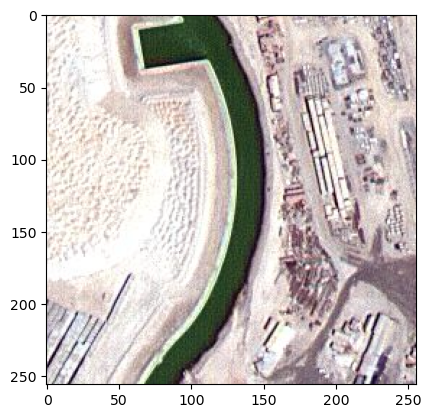

In [34]:
plt.imshow(image_dataset[0])

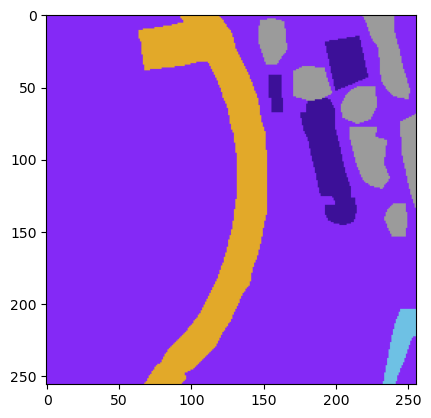

In [35]:
plt.imshow(masks_dataset[0])

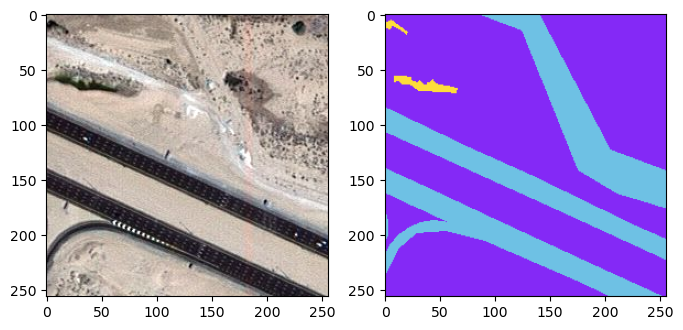

In [37]:
#Side by Side Plotting of image and masks
plt.figure(figsize=(8,6))
plt.subplot(121)  #Single argument to subplot must be a three-digit integer, not 1
plt.imshow(image_dataset[820]) #820 is the image number in image dataset
plt.subplot(122)  #Single argument to subplot must be a three-digit integer, not 1
plt.imshow(masks_dataset[820]) #820 is the corresponding mask in masks dataset

In [37]:
import random


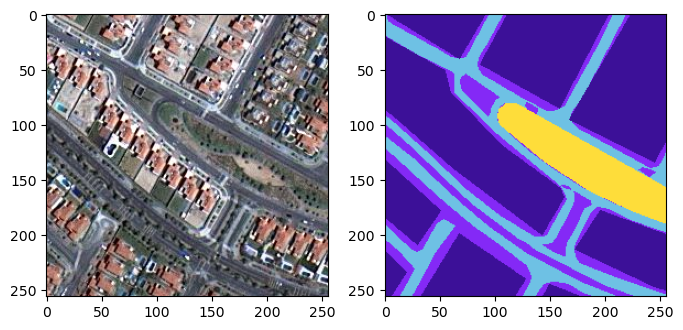

In [41]:
#Display a random image and its correspong mask
import random
random_image_id=random.randint(0,len(image_dataset))
plt.figure(figsize=(8,6))
plt.subplot(121)  #Single argument to subplot must be a three-digit integer, not 1
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)  #Single argument to subplot must be a three-digit integer, not 1
plt.imshow(masks_dataset[random_image_id])

In [42]:
#Processing Mask Image Labels
#Apply One Hot Encoding with labels Hex Images type to set RGB Labels
class_building='#3C1098'
class_building=class_building.lstrip('#') #Remove # from hex color code
class_building=np.array(tuple(int(class_building[i:i+2],16) for i in (0,2,4)))
print(class_building)

class_land='#8429F6'
class_land=class_land.lstrip('#') #Remove # from hex color code
class_land=np.array(tuple(int(class_land[i:i+2],16) for i in (0,2,4)))
print(class_land)

class_road='#6EC1E4'
class_road=class_road.lstrip('#') #Remove # from hex color code
class_road=np.array(tuple(int(class_road[i:i+2],16) for i in (0,2,4)))
print(class_road)

class_vegetation='#FEDD3A'
class_vegetation=class_vegetation.lstrip('#') #Remove # from hex color code
class_vegetation=np.array(tuple(int(class_vegetation[i:i+2],16) for i in (0,2,4)))
print(class_vegetation)

class_water='#E2A929'
class_water=class_water.lstrip('#') #Remove # from hex color code
class_water=np.array(tuple(int(class_water[i:i+2],16) for i in (0,2,4)))
print(class_water)

class_unlabeled='#9B9B9B'
class_unlabeled=class_unlabeled.lstrip('#') #Remove # from hex color code
class_unlabeled=np.array(tuple(int(class_unlabeled[i:i+2],16) for i in (0,2,4)))
print(class_unlabeled)


[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [43]:
masks_dataset.shape

(945, 256, 256, 3)

In [44]:
masks_dataset.shape[0]

945

In [45]:
#Define a method to convert RGB values to Labels
#CLass Labels are predefined in Json File
def rgb_to_label(label):
  label_segment=np.zeros(label.shape, dtype=np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_vegetation, axis=-1)] = 4
  label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
  label_segment=label_segment[:,:,0]
  print(label_segment)
  return label_segment



In [46]:
labels=[]
for i in range(masks_dataset.shape[0]):
  label=rgb_to_label(masks_dataset[i])
  labels.append(label)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
[[1 5 5 ... 0 0 0]
 [1 5 5 ... 0 0 0]
 [1 1 5 ... 0 0 0]
 ...
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]]
[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [2 2 2 ... 1 1 1]
 [2 2 2 ... 1 1 1]
 [2 2 2 ... 1 1 1]]
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
[[1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
[[2 2 2 ... 1 1 1]
 [2 2 2 ... 1 1 1]
 [2 2 2 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]]
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [

In [47]:
print(len(labels)) #No of labels must be same as no of mask images

945


In [48]:
labels=np.array(labels)

In [49]:
random_label=random.randint(0,labels.shape[0])
labels[random_label]

array([[3, 3, 3, ..., 1, 1, 1],
       [3, 3, 3, ..., 1, 1, 1],
       [3, 3, 3, ..., 1, 1, 1],
       ...,
       [4, 4, 4, ..., 1, 1, 1],
       [4, 4, 4, ..., 1, 1, 1],
       [4, 4, 4, ..., 1, 1, 1]], dtype=uint8)

In [50]:
#Expand the Dimension
labels=np.expand_dims(labels,axis=3)


In [51]:
labels[5]

array([[[2],
        [2],
        [2],
        ...,
        [1],
        [1],
        [1]],

       [[2],
        [2],
        [2],
        ...,
        [1],
        [1],
        [1]],

       [[2],
        [2],
        [2],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [52]:
#Get tbhe unique value of labels
print(np.unique(labels))

[0 1 2 3 4 5]


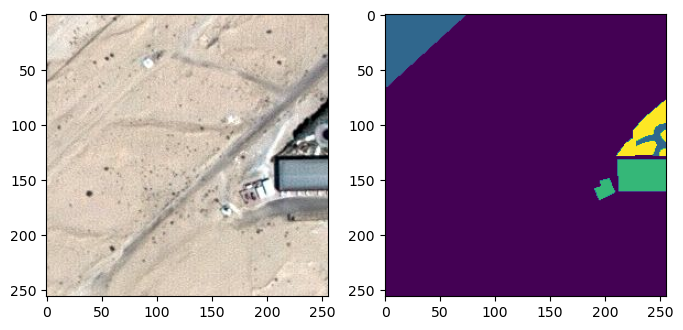

In [53]:
#Render labels with the images
random_image_id=random.randint(0,len(image_dataset))
plt.figure(figsize=(8,6))
plt.subplot(121)  #Single argument to subplot must be a three-digit integer, not 1
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)  #Single argument to subplot must be a three-digit integer, not 1
plt.imshow(labels[random_image_id])  #Use labels in place of mAsks

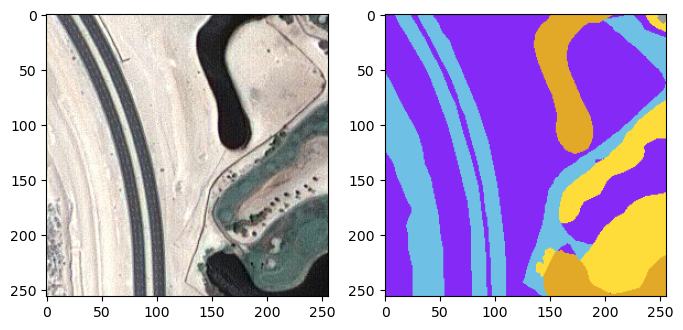

In [54]:
#Compare image with masks and labels for same image id
plt.figure(figsize=(8,6))
plt.subplot(121)  #Single argument to subplot must be a three-digit integer, not 1
plt.imshow(image_dataset[93])
plt.subplot(122)  #Single argument to subplot must be a three-digit integer, not 1
plt.imshow(masks_dataset[93])  #Use mAsks



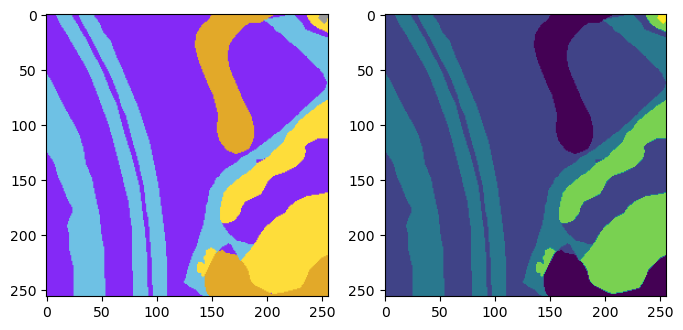

In [55]:
plt.figure(figsize=(8,6))
plt.subplot(121)  #Single argument to subplot must be a three-digit integer, not 1
plt.imshow(masks_dataset[93])
plt.subplot(122)  #Single argument to subplot must be a three-digit integer, not 1
plt.imshow(labels[93])  #Use mAsks


In [56]:
total_classes=len(np.unique(labels))
print(total_classes)

6


In [57]:
#Create Categorical Labels dataset
from tensorflow.keras.utils import to_categorical
labels_categorical_dataset=to_categorical(labels, num_classes=total_classes)
labels_categorical_dataset.shape

(945, 256, 256, 6)

In [58]:
# Creating training dataset
master_training_dataset=image_dataset

In [59]:
#Train Test SPlit
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(master_training_dataset,labels_categorical_dataset, test_size=0.15, random_state=100)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(803, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 3)
(142, 256, 256, 6)


In [60]:
image_height=X_train.shape[1]
image_width=X_train.shape[2]
NO_of_Channels=X_train.shape[3]
No_of_Classes=y_train.shape[3]
print('image Height=',image_height)
print('image Width=',image_width)
print('Channels=',NO_of_Channels)
print('No of CLasses=',No_of_Classes)

image Height= 256
image Width= 256
Channels= 3
No of CLasses= 6


In [53]:
#Part 2 Deep Learning With Satellite Data

In [61]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [62]:
from keras import backend as K

In [63]:
def jaccard_coef(y_true, y_pred):
  y_true_flatten=K.flatten(y_true)
  y_pred_flatten=K.flatten(y_pred)
  intersection= K.sum(y_true_flatten * y_pred_flatten)
  final_coef_value= (intersection + 1.0) / (K.sum(y_true_flatten)+K.sum(y_pred_flatten))
  return final_coef_value

In [174]:
# from tensorflow.keras.applications import VGG16
# #from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, concatenate, UpSampling2D

# def build_unet(input_shape, num_classes):
#     # Load pre-trained VGG16 model
#     vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
#     # Freeze VGG16 layers to prevent them from being updated during training
#     for layer in vgg16.layers:
#         layer.trainable = False

#     # Encoder
#     # Extract features from VGG16 (encoder)
#     encoder_outputs = [vgg16.get_layer(name).output for name in ['block1_pool', 'block2_pool', 'block3_pool', 'block4_pool']]

#     # Decoder
#     conv5 = Conv2D(256, 3, activation='relu', padding='same')(vgg16.output)
#     # conv5 = Dropout(0.5)(conv5)
#     conv5 = Conv2D(256, 3, activation='relu', padding='same')(conv5)
    
#     up6 = Conv2DTranspose(64, 2, strides=(2, 2), padding='same')(conv5)
#     up6 = concatenate([up6, encoder_outputs[3]], axis=-1)
#     conv6 = Conv2D(128, 3, activation='relu', padding='same')(up6)
#     conv6 = Conv2D(128, 3, activation='relu', padding='same')(conv6)

#     up7 = Conv2DTranspose(32, 2, strides=(2, 2), padding='same')(conv6)
#     up7 = concatenate([up7, encoder_outputs[2]], axis=-1)
#     conv7 = Conv2D(64, 3, activation='relu', padding='same')(up7)
#     conv7 = Conv2D(64, 3, activation='relu', padding='same')(conv7)

#     up8 = Conv2DTranspose(16, 2, strides=(2, 2), padding='same')(conv7)
#     up8 = concatenate([up8, encoder_outputs[1]], axis=-1)
#     conv8 = Conv2D(32, 3, activation='relu', padding='same')(up8)
#     conv8 = Conv2D(32, 3, activation='relu', padding='same')(conv8)
    
#     up9 = Conv2DTranspose(8, 2, strides=(2, 2), padding='same')(conv8)
#     up9 = concatenate([up9, encoder_outputs[0]], axis=-1)
#     conv9 = Conv2D(16, 3, activation='relu', padding='same')(up9)
#     conv9 = Conv2D(16, 3, activation='relu', padding='same')(conv9)

#     # up9 = Conv2DTranspose(16, 2, strides=(2, 2), padding='same')(conv8)
#     # up9 = concatenate([UpSampling2D((2, 2))(conv8), encoder.get_layer('block1_pool').output], axis=-1)
#     # conv9 = Conv2D(16, 3, activation='relu', padding='same')(up9)
#     # conv9 = Conv2D(16, 3, activation='relu', padding='same')(conv9)

#     # Output layer
#     output = Conv2D(num_classes, 1, activation='softmax')(conv9)

#     model = Model(inputs=vgg16.input, outputs=output)
#     return model

# # Define input shape and number of classes
# input_shape = (image_height, image_width, NO_of_Channels)
# num_classes = No_of_Classes


# def get_deep_learning_model():
#     return build_unet(num_classes=No_of_Classes, input_shape=input_shape)

# model = get_deep_learning_model()
# model.summary()
# # # Build U-Net model with transfer learning from VGG16
# # model = build_unet(input_shape, num_classes)
# # return model
# # # # Compile the model
# # # model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # # # Print model summary
# # # model.summary()


Model: "model_51"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_60 (InputLayer)       [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 256, 256, 64)         1792      ['input_60[0][0]']            
                                                                                                  
 block1_conv2 (Conv2D)       (None, 256, 256, 64)         36928     ['block1_conv1[0][0]']        
                                                                                                  
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)         0         ['block1_conv2[0][0]']        
                                                                                           

In [135]:
# from tensorflow.keras.applications import VGG16
# #from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, concatenate, UpSampling2D


# # Load pre-trained VGG16 model
# vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# # Encoder
# encoder = Model(inputs=vgg16.input, outputs=vgg16.get_layer('block4_pool').output)
# print(encoder.output.shape)
# print(encoder.get_layer('block3_pool').output.shape)

# # Decoder
# inputs = Input(input_shape)
# x = encoder(inputs)

# x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
# x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
# x = UpSampling2D((2, 2))(x)

# x = concatenate([x, encoder.get_layer('block3_pool').output], axis=3)
# x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
# x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
# x = UpSampling2D((2, 2))(x)

# x = concatenate([x, encoder.get_layer('block2_pool').output], axis=3)
# x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
# x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
# x = UpSampling2D((2, 2))(x)

# x = concatenate([x, encoder.get_layer('block1_pool').output], axis=3)
# x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
# x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)

# # Output layer
# x = Conv2D(num_classes, (1, 1), activation='softmax')(x)

# def get_deep_learning_model():
#   return build_unet(num_classes=No_of_Classes, input_shape=input_shape)

# model = get_deep_learning_model()
# model.summary()

(None, 16, 16, 512)
(None, 32, 32, 256)
(None, 16, 16, 512)
(None, 32, 32, 256)


AttributeError: 'NoneType' object has no attribute 'summary'

In [60]:
# def multi_unet_model(n_classes=5, image_height=256, image_width=256, image_channels=1):
#   inputs = Input((image_height, image_width, image_channels))
#   source_input=inputs

#   c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
#   c1 = Dropout(0.2)(c1)
#   c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
#   p1 = MaxPooling2D((2,2))(c1)

#   c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
#   c2 = Dropout(0.2)(c2)
#   c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
#   p2 = MaxPooling2D((2,2))(c2)

#   c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
#   c3 = Dropout(0.2)(c3)
#   c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
#   p3 = MaxPooling2D((2,2))(c3)

#   c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
#   c4 = Dropout(0.2)(c4)
#   c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
#   p4 = MaxPooling2D((2,2))(c4)

#   c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
#   c5 = Dropout(0.2)(c5)
#   c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

#   u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding= "same")(c5)
#   u6 = concatenate([u6,c4])
#   c6 = Conv2D(128, (3,3), activation= "relu", kernel_initializer= "he_normal", padding="same")(u6)
#   c6 = Dropout(0.2)(c6)
#   c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding= "same")(c6)

#   u7 = Conv2DTranspose(64, (2,2),strides=(2,2), padding= "same")(c6)
#   u7 = concatenate([u7,c3])
#   c7 = Conv2D(64, (3,3), activation= "relu", kernel_initializer= "he_normal", padding="same")(u7)
#   c7 = Dropout(0.2)(c7)
#   c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding= "same")(c7)

#   u8 = Conv2DTranspose(32, (2,2),strides=(2,2), padding= "same")(c7)
#   u8 = concatenate([u8,c2]) #By default concaenation is performed at axis=-1
#   c8 = Conv2D(32, (3,3), activation= "relu", kernel_initializer= "he_normal", padding="same")(u8)
#   c8 = Dropout(0.2)(c8)
#   c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding= "same")(c8)

#   u9 = Conv2DTranspose(16, (2,2),strides=(2,2), padding= "same")(c8)
#   u9 = concatenate([u9,c1], axis=3) #Last Concatenation is performed at axis=3
#   c9 = Conv2D(16, (3,3), activation= "relu", kernel_initializer= "he_normal", padding="same")(u9)
#   c9 = Dropout(0.2)(c9)
#   c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding= "same")(c9)

#   outputs = Conv2D(n_classes, (1,1), activation = "softmax")(c9)
#   model = Model(inputs=[inputs], outputs=[outputs])
#   return model


In [175]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16

In [176]:
def conv_block(inputs,filterCount):
    x = Conv2D(filterCount,3,padding="same")(inputs)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    
    x = Conv2D(filterCount,3,padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    
    return x
def decoder_block(inputs,skip_features,filter_count):
    
    x = Conv2DTranspose(filter_count, (2, 2), strides=2, padding="same")(inputs)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, filter_count)
    return x   

In [181]:
def build_unet(input_shape,num_classes):
    inputs = Input(input_shape)
    print(inputs.shape)
    vgg16 = VGG16(include_top=False,weights='imagenet',input_tensor = inputs)
    #vgg16.summary()
    # the encoder 
    skip1 = vgg16.get_layer("block1_conv2").output
    print(skip1.shape)
    skip2 = vgg16.get_layer("block2_conv2").output
    skip3 = vgg16.get_layer("block3_conv3").output
    skip4 = vgg16.get_layer("block4_conv3").output
    # the center
    center = vgg16.get_layer("block5_conv3").output
    
    # the decoder 
    
    d1 = decoder_block(center,skip4,512)
    d2 = decoder_block(d1,skip3,256)
    d3 = decoder_block(d2,skip2,128)
    d4 = decoder_block(d3,skip1,64)
    #output
    #conv1 = Conv2D(32,3,padding="same")(d4)
    #conv2 = Conv2D(16,3,padding="same")(conv1)
    output = Conv2D(num_classes, 1, padding="same", activation="softmax")(d4)
    model = Model(inputs=vgg16.input, outputs=output)
    return model

In [61]:
#Setting Model Metrices

In [182]:
metrics = ["accuracy", jaccard_coef]

In [185]:
# Define input shape and number of classes
# input_shape = (256, 256, 3)
# num_classes = 5
def get_deep_learning_model():
  return build_unet(num_classes=No_of_Classes, input_shape=input_shape)

In [186]:

model = get_deep_learning_model()
model.summary()

(None, 256, 256, 3)
(None, 256, 256, 64)
Model: "model_53"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_63 (InputLayer)       [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 256, 256, 64)         1792      ['input_63[0][0]']            
                                                                                                  
 block1_conv2 (Conv2D)       (None, 256, 256, 64)         36928     ['block1_conv1[0][0]']        
                                                                                                  
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)         0         ['block1_conv2[0][0]']        
                                                  

In [187]:

model

In [188]:
model.get_config()

{'name': 'model_53',
 'trainable': True,
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_63'},
   'registered_name': None,
   'name': 'input_63',
   'inbound_nodes': []},
  {'module': 'keras.layers',
   'class_name': 'Conv2D',
   'config': {'name': 'block1_conv1',
    'trainable': True,
    'dtype': 'float32',
    'filters': 64,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel

In [98]:
#Loss Function
#Focal Loss (Cross Entropy Lass Extension)

In [189]:
weights=[0.1666,0.1666, 0.1666, 0.1666, 0.1666, 0.1666] #1/6 where 6 is the number of classes in our dataset

In [71]:
# !pip install keras

Defaulting to user installation because normal site-packages is not writeable


In [72]:
import keras

In [74]:
!pip install -U segmentation-models 
#to import pretrained segmentation models for keras and tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [190]:
%env SM_FRAMEWORK=tf.keras
import segmentation_models as sm
#sm.set_framework('tf.keras')

env: SM_FRAMEWORK=tf.keras


In [191]:
dice_loss= sm.losses.DiceLoss(class_weights = weights)

In [192]:
focal_loss = sm.losses.CategoricalFocalLoss(weights)

In [193]:
total_loss=dice_loss + (1 * focal_loss)

In [76]:
# Model COmpilation

In [194]:
import tensorflow as tf


In [195]:
tf.keras.backend.clear_session()

In [196]:
model.compile(optimizer = "adam", loss = total_loss, metrics=metrics)

In [197]:
model.summary()

Model: "model_53"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_63 (InputLayer)       [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 256, 256, 64)         1792      ['input_63[0][0]']            
                                                                                                  
 block1_conv2 (Conv2D)       (None, 256, 256, 64)         36928     ['block1_conv1[0][0]']        
                                                                                                  
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)         0         ['block1_conv2[0][0]']        
                                                                                           

In [112]:
# MOdel Training

In [198]:
model.history=model.fit(X_train, y_train,
                        batch_size=16,
                        verbose=1,
                        epochs=1,
                        validation_data=(X_test, y_test),
                        shuffle= False)

12/51 [======>.......................] - ETA: 21:35 - loss: 0.9684 - accuracy: 0.6314 - jaccard_coef: 0.2520

In [ ]:
history_a=model.history

Text(0, 0.5, 'Loss')

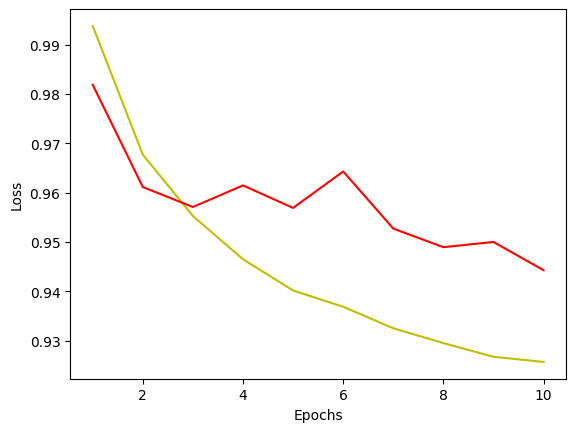

In [ ]:
loss=history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'y', label = "Training Loss")
plt.plot(epochs, val_loss, 'r', label= 'Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

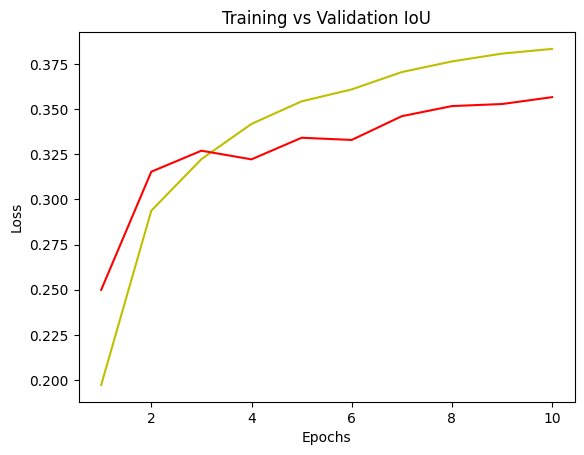

In [ ]:
jaccard_coef=history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']
epochs = range(1, len(jaccard_coef)+1)
plt.plot(epochs, jaccard_coef, 'y', label = "Training IoU")
plt.plot(epochs, val_jaccard_coef, 'r', label= 'Validation IoU')
plt.title("Training vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [ ]:
loss_history

[0.9938161373138428,
 0.9677067995071411,
 0.9552650451660156,
 0.946491003036499,
 0.9401496648788452,
 0.9368590712547302,
 0.932494580745697,
 0.929484486579895,
 0.9267027974128723,
 0.9256650805473328]